### IMAGE CLASSIFICATION WITH LOGISTIC REGRESSION 

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

#### Determining the Total Number of Images and Labels

In [2]:
print("Image data shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image data shape (1797, 64)
Label Data Shape (1797,)


In [3]:
type(digits.data)

numpy.ndarray

#### Dipalying some of these images 

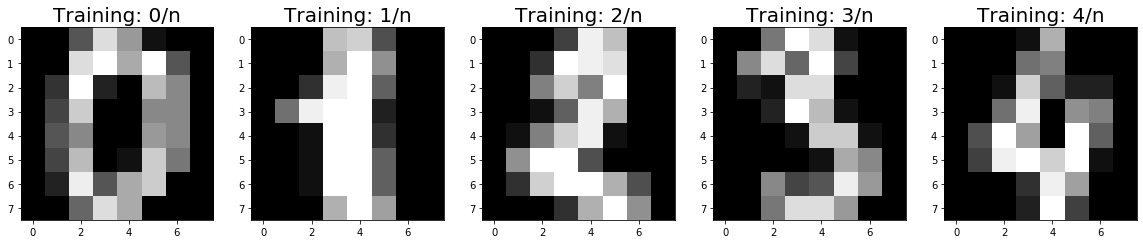

In [4]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i/n' % label,fontsize=20)

#### Dividing Dataset into Training and Test Set 

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [10]:
print(x_train.shape)

(1383, 64)


In [11]:
print(x_test.shape)

(414, 64)


In [12]:
print(y_train.shape)

(1383,)


In [13]:
print(y_test.shape)

(414,)


#### IMPORT LOGISTIC REGRESSION MODEL

In [14]:
from sklearn.linear_model import LogisticRegression

#### Making an instance of the model 

In [15]:
logreg =  LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### predicting the first element of the test

In [16]:
print(logreg.predict(x_test[0].reshape(1,-1)))

[4]


### predicting the entire test set 

In [17]:
predictions = logreg.predict(x_test)

In [20]:
score = logreg.score(x_test,y_test)

In [21]:
print(score)

0.9420289855072463


### Representing the confusion matrix in a heatmap 

Text(0.5, 1, 'Accuracy Score: 0.9420289855072463')

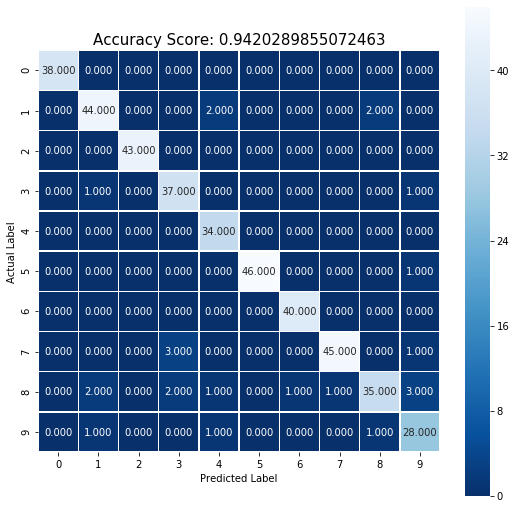

In [24]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(predictions,y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".3f",linewidths =.5,square=True,cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)